# Data Set : Systolic Blood Pressure Data
## Description:

### Lab-techinicians in a laboratory decided to assess the association between BMI and Systolic blood pressure. Additionally, they collected data on Age, Body weight,and treatment for hypertension of 100 persons.

### Regression Problem: Predict systolic blood pressure

### Predict blood pressure based on BMI, BodyWeight, Age , Treatment for hypertension, and other covariates measured for that person.


## Generative Model:

# SystolicBP=60+0.58BMI+0.65Age+6.44(Treatmentforhypertension)+0.7(Heightofaperson)

### Data contains :

## Target: Systolic blood pressure( in mm Hg)

## Feature 1: Age

## Feature 2: Treatment for hypertension (1-Yes,0-No)

## Feature 3: Gender (1-Yes,0-No)

## Feature 4: Number of members in the family

## Feature 5: Food habit (1-Vegan,2-Any)

## Feature 6: Weight of a person (in Kg)

## Feature 7: Height of a person (in m)

## Feature 8: ScaledBMI


# Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import linear_model
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as ols
from sklearn import preprocessing
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
matplotlib.style.use('ggplot')
init_notebook_mode(connected=False)
import math

# Reading and Cleaning the data

In [2]:
sbp_data =  pd.read_csv('Ex03_SystolicBP_Regreesion.csv')
sbp_data.shape

(100, 9)

# Checking my dataset

In [3]:
print(sbp_data.dtypes)
sbp_data.describe()

Age             int64
Treated         int64
Gender          int64
FamilySize      int64
Diet            int64
Weight        float64
Height        float64
ScaledBMI     float64
SystolicBP    float64
dtype: object


Age     Treated      Gender  FamilySize        Diet      Weight  \
count  100.00000  100.000000  100.000000   100.00000  100.000000  100.000000   
mean    50.44000    0.540000    0.440000     2.46000    1.480000   80.144936   
std      7.43228    0.500908    0.498888     1.09563    0.502117    9.699516   
min     33.00000    0.000000    0.000000     1.00000    1.000000   39.247748   
25%     45.00000    0.000000    0.000000     1.75000    1.000000   73.816154   
50%     50.00000    1.000000    0.000000     2.00000    1.000000   79.516118   
75%     55.25000    1.000000    1.000000     3.00000    2.000000   87.709559   
max     71.00000    1.000000    1.000000     4.00000    2.000000  100.565423   

           Height   ScaledBMI  SystolicBP  
count  100.000000  100.000000  100.000000  
mean     1.608972   31.374440  115.586424  
std      0.101457    5.794455    6.255289  
min      1.392920   15.983278  102.161103  
25%      1.539363   27.482580  111.019228  
50%      1.613542   31.579012  115.199929  
75%      1.669585   34.523879  119.539757  
max      1.911226   47.524018  132.704641

# Scaling the data

In [4]:
names = sbp_data.columns.tolist()
for i in range(len(names)):
    mean = sbp_data[names[i]].mean()
    sd = sbp_data[names[i]].std()
    sbp_data[names[i]] = (sbp_data[names[i]] - mean)/sd
sbp_data

Age   Treated    Gender  FamilySize      Diet    Weight    Height  \
0  -0.731942  0.918332 -0.881962   -0.419850  1.035616  1.959291  0.709262   
1   1.555377  0.918332  1.122497    1.405585 -0.955953 -0.364464 -0.977749   
2   1.420829  0.918332 -0.881962   -0.419850  1.035616 -0.775832  0.818522   
3   0.075347  0.918332 -0.881962    0.492867  1.035616 -0.648141 -0.048396   
4  -1.135587  0.918332 -0.881962   -0.419850 -0.955953  0.383207  0.393097   
5   0.748088  0.918332  1.122497   -0.419850 -0.955953 -1.409776 -0.287383   
6   2.093570 -1.078042 -0.881962    1.405585  1.035616  0.998415  0.384669   
7   1.286281  0.918332 -0.881962    0.492867 -0.955953  2.105310  0.359579   
8  -0.597394 -1.078042 -0.881962   -1.332567  1.035616  1.179939  0.260046   
9  -0.731942 -1.078042 -0.881962   -0.419850  1.035616 -0.421284 -2.049268   
10  0.075347  0.918332  1.122497    1.405585  1.035616  0.024780 -0.411927   
11 -1.673780  0.918332 -0.881962   -0.419850 -0.955953 -0.171390 -0.984274   
12  1.824474 -1.078042  1.122497    1.405585  1.035616  0.628152  0.145967   
13 -1.404683  0.918332 -0.881962    0.492867 -0.955953 -0.776854 -0.064727   
14  0.882636  0.918332 -0.881962    1.405585 -0.955953 -0.257134 -0.444511   
15 -0.059201 -1.078042 -0.881962    1.405585  1.035616 -0.165349  1.198272   
16 -0.866490 -1.078042  1.122497    0.492867  1.035616  0.005860  0.647328   
17 -1.808328 -1.078042  1.122497    0.492867  1.035616  0.301492 -1.588450   
18  0.075347 -1.078042 -0.881962    0.492867  1.035616 -0.880941 -0.080648   
19  0.209895 -1.078042 -0.881962    0.492867 -0.955953  0.530154 -1.768445   
20 -0.328298  0.918332 -0.881962    1.405585  1.035616  0.830860  0.961820   
21  0.478992  0.918332  1.122497   -1.332567  1.035616  0.227686  0.890841   
22  0.344443 -1.078042 -0.881962    0.492867  1.035616  1.337227 -0.502850   
23 -0.193749 -1.078042  1.122497    0.492867  1.035616 -4.216416 -0.413499   
24 -1.135587  0.918332 -0.881962    1.405585  1.035616  0.853667 -2.129490   
25  0.344443 -1.078042 -0.881962    1.405585  1.035616  0.960778  0.832982   
26  0.748088 -1.078042  1.122497   -0.419850 -0.955953  1.220236  1.439143   
27 -0.462846 -1.078042  1.122497    0.492867 -0.955953 -0.599198 -1.203703   
28 -0.731942  0.918332 -0.881962   -1.332567 -0.955953 -1.709162 -0.907842   
29  0.209895 -1.078042 -0.881962   -0.419850 -0.955953 -0.388284 -1.132825   
..       ...       ...       ...         ...       ...       ...       ...   
70  1.824474  0.918332 -0.881962   -1.332567 -0.955953 -0.665516  1.787859   
71 -1.001039  0.918332 -0.881962    0.492867 -0.955953 -1.141781  0.046999   
72 -0.866490 -1.078042 -0.881962    0.492867  1.035616  0.170735 -0.963720   
73 -1.135587  0.918332 -0.881962   -1.332567 -0.955953 -0.320157 -1.064104   
74  0.478992 -1.078042  1.122497   -1.332567  1.035616  0.613297  1.770358   
75 -0.866490  0.918332 -0.881962    0.492867 -0.955953 -0.863930 -1.252766   
76  0.209895 -1.078042  1.122497   -1.332567 -0.955953  0.596581 -0.448701   
77  0.613540 -1.078042 -0.881962    0.492867  1.035616  0.619216 -0.381869   
78  0.209895 -1.078042  1.122497   -0.419850 -0.955953  0.468125 -1.667754   
79 -0.328298 -1.078042  1.122497   -1.332567  1.035616 -1.355815  0.335816   
80  0.075347  0.918332  1.122497    1.405585 -0.955953 -0.275437  0.893009   
81  0.882636  0.918332 -0.881962   -1.332567 -0.955953  0.980666  0.092517   
82 -0.059201 -1.078042  1.122497   -0.419850 -0.955953 -0.232577 -1.463398   
83 -0.193749 -1.078042 -0.881962    0.492867 -0.955953 -1.450162  1.129651   
84 -0.193749 -1.078042  1.122497   -0.419850 -0.955953  2.024603 -0.977598   
85  0.209895  0.918332 -0.881962   -0.419850  1.035616 -0.637331 -0.466063   
86  0.478992 -1.078042 -0.881962    1.405585 -0.955953 -0.921111  1.050867   
87 -0.059201  0.918332  1.122497   -0.419850 -0.955953  0.367329  0.436952   
88 -1.001039  0.918332 -0.881962    1.405585  1.035616 -0.445665 -1.247058   
89 -0.597394 -1.078042  1.12249

# Splitting the data (90-10)

In [5]:
splitend = int(0.9 * len(sbp_data))
sbp_data_shuffled = sbp_data.sample(frac=1)
train, test = sbp_data_shuffled[:splitend], sbp_data_shuffled[splitend:]

# Finding the correlation amongst the variables

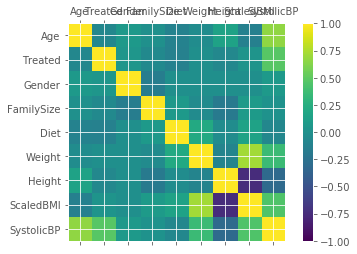

In [6]:
correlation_before_feature_selection =  sbp_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation_before_feature_selection, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, len(names), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

# Plotting the correlation scatter matrix with each variable

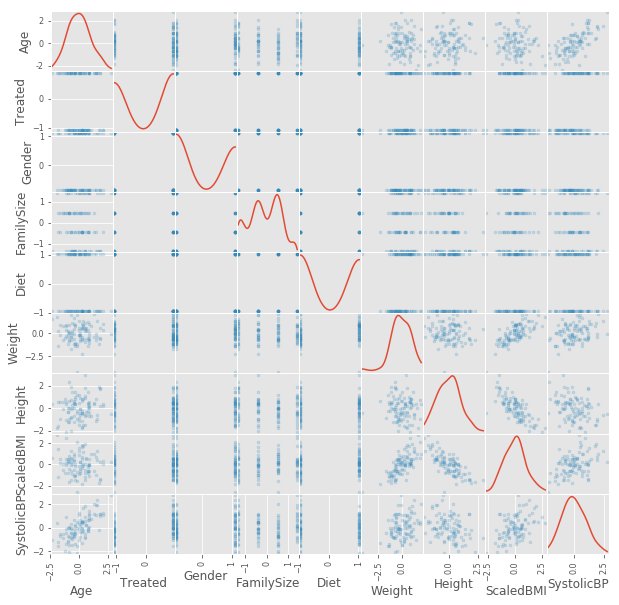

In [7]:
scatter_matrix(sbp_data, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

# Splitting the data as X_train/Y_train and X_test/Y_test

In [8]:
X_train = train.iloc[:, 0:8]
Y_train = train.iloc[:, 8] 
X_test = test.iloc[:, 0:8]
Y_test = test.iloc[:, 8]

In [9]:
X_train

Age   Treated    Gender  FamilySize      Diet    Weight    Height  \
30  0.344443  0.918332  1.122497    1.405585 -0.955953  0.839993 -1.464736   
93  0.882636  0.918332  1.122497   -0.419850  1.035616 -0.632853  0.238349   
56  0.748088 -1.078042  1.122497   -0.419850  1.035616  0.365627  0.386424   
23 -0.193749 -1.078042  1.122497    0.492867  1.035616 -4.216416 -0.413499   
73 -1.135587  0.918332 -0.881962   -1.332567 -0.955953 -0.320157 -1.064104   
17 -1.808328 -1.078042  1.122497    0.492867  1.035616  0.301492 -1.588450   
20 -0.328298  0.918332 -0.881962    1.405585  1.035616  0.830860  0.961820   
9  -0.731942 -1.078042 -0.881962   -0.419850  1.035616 -0.421284 -2.049268   
88 -1.001039  0.918332 -0.881962    1.405585  1.035616 -0.445665 -1.247058   
21  0.478992  0.918332  1.122497   -1.332567  1.035616  0.227686  0.890841   
10  0.075347  0.918332  1.122497    1.405585  1.035616  0.024780 -0.411927   
59 -0.597394 -1.078042 -0.881962   -1.332567  1.035616  0.222864  0.021032   
61 -0.462846 -1.078042 -0.881962    0.492867 -0.955953  0.448942 -0.695537   
1   1.555377  0.918332  1.122497    1.405585 -0.955953 -0.364464 -0.977749   
12  1.824474 -1.078042  1.122497    1.405585  1.035616  0.628152  0.145967   
76  0.209895 -1.078042  1.122497   -1.332567 -0.955953  0.596581 -0.448701   
91  1.017184 -1.078042 -0.881962   -1.332567  1.035616  0.776494 -0.677921   
28 -0.731942  0.918332 -0.881962   -1.332567 -0.955953 -1.709162 -0.907842   
43  0.478992  0.918332  1.122497   -1.332567  1.035616  1.130480 -1.467672   
99 -1.808328  0.918332  1.122497   -0.419850 -0.955953 -1.341632  0.529202   
58  0.209895 -1.078042  1.122497   -0.419850 -0.955953 -2.260787  0.640173   
7   1.286281  0.918332 -0.881962    0.492867 -0.955953  2.105310  0.359579   
70  1.824474  0.918332 -0.881962   -1.332567 -0.955953 -0.665516  1.787859   
79 -0.328298 -1.078042  1.122497   -1.332567  1.035616 -1.355815  0.335816   
39  0.209895 -1.078042 -0.881962   -0.419850 -0.955953  1.032079  0.807103   
0  -0.731942  0.918332 -0.881962   -0.419850  1.035616  1.959291  0.709262   
80  0.075347  0.918332  1.122497    1.405585 -0.955953 -0.275437  0.893009   
78  0.209895 -1.078042  1.122497   -0.419850 -0.955953  0.468125 -1.667754   
64  1.420829  0.918332 -0.881962   -1.332567 -0.955953 -0.090098 -1.125581   
83 -0.193749 -1.078042 -0.881962    0.492867 -0.955953 -1.450162  1.129651   
..       ...       ...       ...         ...       ...       ...       ...   
57 -0.193749  0.918332  1.122497    1.405585 -0.955953 -1.212322 -0.283975   
81  0.882636  0.918332 -0.881962   -1.332567 -0.955953  0.980666  0.092517   
18  0.075347 -1.078042 -0.881962    0.492867  1.035616 -0.880941 -0.080648   
31  1.824474  0.918332 -0.881962   -1.332567 -0.955953 -0.570425  1.709747   
25  0.344443 -1.078042 -0.881962    1.405585  1.035616  0.960778  0.832982   
60 -0.866490 -1.078042 -0.881962   -1.332567 -0.955953 -0.725960  2.287602   
19  0.209895 -1.078042 -0.881962    0.492867 -0.955953  0.530154 -1.768445   
11 -1.673780  0.918332 -0.881962   -0.419850 -0.955953 -0.171390 -0.984274   
85  0.209895  0.918332 -0.881962   -0.419850  1.035616 -0.637331 -0.466063   
92  0.882636  0.918332  1.122497    0.492867 -0.955953  0.023625  0.048138   
90  0.075347 -1.078042 -0.881962    0.492867  1.035616 -0.149798 -0.605874   
22  0.344443 -1.078042 -0.881962    0.492867  1.035616  1.337227 -0.502850   
2   1.420829  0.918332 -0.881962   -0.419850  1.035616 -0.775832  0.818522   
98 -0.866490  0.918332  1.122497    0.492867  1.035616  0.947596 -0.018915   
41  1.689926 -1.078042 -0.881962   -1.332567 -0.955953 -1.171801  1.888563   
24 -1.135587  0.918332 -0.881962    1.405585  1.035616  0.853667 -2.129490   
68 -0.462846 -1.078042 -0.881962   -0.419850  1.035616  1.058753  0.427227   
36 -0.328298  0.918332 -0.881962   -0.419850 -0.955953 -1.154776  0.391820   
74  0.478992 -1.078042  1.122497   -1.332567  1.035616  0.613297  1.770358   
45  2.093570 -1.078042  1.12249

# LASSO REGRESSION

# Plotting the Lasso Regression

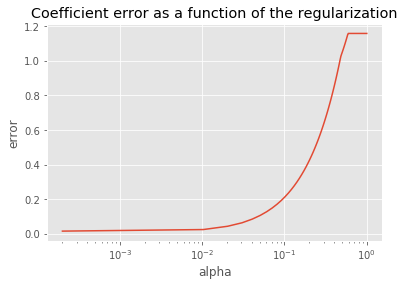

In [10]:
alpha1 =  np.linspace(0.0002, 1, 100)
lasso = linear_model.Lasso()
coefs = []
errors = []
for a1 in alpha1:
    lasso.set_params(alpha=a1)
    lasso.fit(X_train, Y_train)
    coefs.append(lasso.coef_)
    residual = lasso.predict(X_test) - Y_test
    rmse = np.sqrt(np.mean(residual ** 2))
    errors.append(rmse)
plt.subplot(111)
ax = plt.gca()
ax.plot(alpha1, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')
plt.show()

df1 = pd.DataFrame(alpha1)
df2 = pd.DataFrame(coefs)
df = df1.join(df2,how='right',lsuffix='_x')
lst = ['Alphas','Age','Treated','Gender','FamilySize','Diet','Weight','Height','ScaledBMI']
df.columns = lst

In [11]:
trace0 = go.Scatter(
    x = df.Alphas,
    y = df.Age,
    name = 'Age',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = df.Alphas,
    y = df.Treated,
    name = 'Treated',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4)
)
trace2 = go.Scatter(
    x = df.Alphas,
    y = df.Gender,
    name = 'Gender',
    line = dict(
        color = ('rgb(190, 11, 23)'),
        width = 4)
)
trace3 = go.Scatter(
    x = df.Alphas,
    y = df.FamilySize,
    name = 'Family Size',
    line = dict(
        color = ('rgb(112, 96, 109)'),
        width = 4)
)
trace4 = go.Scatter(
    x = df.Alphas,
    y = df.Diet,
    name = 'Diet',
    line = dict(
        color = ('rgb(106, 12, 24)'),
        width = 4,
    dash = 'dash')
)
trace5 = go.Scatter(
    x = df.Alphas,
    y = df.Weight,
    name = 'Weight',
    line = dict(
        color = ('rgb(1, 96, 167)'),
        width = 4,
     dash = 'dot')
)
trace6 = go.Scatter(
    x = df.Alphas,
    y =df.Height,
    name = 'Height',
    line = dict(
        color = ('rgb(53, 1, 7)'),
        width = 4,
    dash = 'dash')
)
trace7 = go.Scatter(
    x = df.Alphas,
    y =df.ScaledBMI,
    name = 'Scaled BMI',
    line = dict(
        color = ('rgb(176,105,190)'),
        width = 4,
    dash = 'dash')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = 'Systolic BP',
              xaxis = dict(title = 'Alphas'),
              yaxis = dict(title = 'Features'),
              )

fig = dict(data=data, layout=layout)
iplot(fig, filename = 'Lasso_graph')

# Lasso CV

RMSE  0.0149003011325


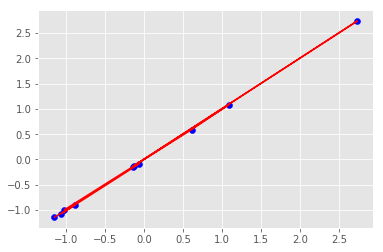

In [12]:
lassocv = linear_model.LassoCV(alphas=None)
lassocv.fit(X_train, Y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, Y_train)
residual = Y_test - lasso.predict(X_test)
print ('RMSE ',np.sqrt(np.mean(residual ** 2)))
plt.scatter(Y_test, lasso.predict(X_test),color = 'Blue')
plt.plot(list(Y_test), lasso.predict(X_test), color='Red')
plt.show()

# RIDGE REGRESSION

# Plotting the Ridge Regression

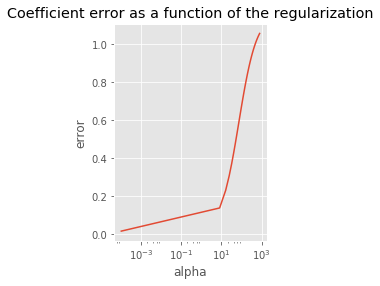

Alphas       Age   Treated    Gender  FamilySize      Diet    Weight  \
0     0.000100  0.771922  0.514632  0.003488   -0.001675 -0.003648  0.002891   
1     8.080907  0.688644  0.464198  0.004324   -0.006758 -0.020629  0.175534   
2    16.161714  0.624160  0.424943  0.006347   -0.008125 -0.027404  0.178202   
3    24.242521  0.570890  0.392045  0.007722   -0.008984 -0.031484  0.175385   
4    32.323328  0.526069  0.364012  0.008638   -0.009512 -0.033902  0.171096   
5    40.404135  0.487806  0.339814  0.009234   -0.009809 -0.035240  0.166314   
6    48.484942  0.454745  0.318698  0.009606   -0.009942 -0.035861  0.161412   
7    56.565749  0.425884  0.300102  0.009820   -0.009957 -0.036000  0.156560   
8    64.646557  0.400466  0.283593  0.009920   -0.009889 -0.035814  0.151844   
9    72.727364  0.377905  0.268832  0.009938   -0.009763 -0.035408  0.147304   
10   80.808171  0.357745  0.255554  0.009897   -0.009596 -0.034855  0.142958   
11   88.888978  0.339620  0.243542  0.009814   -0.009402 -0.034206  0.138811   
12   96.969785  0.323236  0.232623  0.009700   -0.009190 -0.033498  0.134862   
13  105.050592  0.308354  0.222651  0.009565   -0.008968 -0.032755  0.131105   
14  113.131399  0.294776  0.213507  0.009415   -0.008740 -0.031995  0.127531   
15  121.212206  0.282337  0.205092  0.009256   -0.008510 -0.031232  0.124132   
16  129.293013  0.270901  0.197321  0.009090   -0.008282 -0.030474  0.120897   
17  137.373820  0.260350  0.190123  0.008920   -0.008056 -0.029727  0.117817   
18  145.454627  0.250586  0.183435  0.008749   -0.007835 -0.028996  0.114883   
19  153.535434  0.241524  0.177205  0.008579   -0.007620 -0.028283  0.112086   
20  161.616241  0.233091  0.171387  0.008409   -0.007410 -0.027591  0.109417   
21  169.697048  0.225223  0.165942  0.008242   -0.007207 -0.026921  0.106869   
22  177.777856  0.217867  0.160834  0.008078   -0.007010 -0.026273  0.104434   
23  185.858663  0.210974  0.156033  0.007918   -0.006821 -0.025647  0.102105   
24  193.939470  0.204500  0.151512  0.007761   -0.006638 -0.025043  0.099876   
25  202.020277  0.198411  0.147247  0.007608   -0.006462 -0.024461  0.097741   
26  210.101084  0.192671  0.143217  0.007458   -0.006292 -0.023900  0.095693   
27  218.181891  0.187253  0.139403  0.007313   -0.006129 -0.023360  0.093729   
28  226.262698  0.182129  0.135787  0.007172   -0.005972 -0.022839  0.091842   
29  234.343505  0.177277  0.132355  0.007036   -0.005821 -0.022338  0.090030   
..         ...       ...       ...       ...         ...       ...       ...   
70  565.656595  0.084554  0.065082  0.003806   -0.002641 -0.011381  0.049720   
71  573.737402  0.083486  0.064286  0.003762   -0.002603 -0.011242  0.049183   
72  581.818209  0.082445  0.063510  0.003720   -0.002566 -0.011106  0.048657   
73  589.899016  0.081430  0.062751  0.003678   -0.002530 -0.010974  0.048143   
74  597.979823  0.080439  0.062011  0.003637   -0.002495 -0.010844  0.047639   
75  606.060630  0.079472  0.061288  0.003597   -0.002461 -0.010718  0.047146   
76  614.141437  0.078528  0.060582  0.003558   -0.002428 -0.010594  0.046662   
77  622.222244  0.077606  0.059892  0.003520   -0.002395 -0.010473  0.046189   
78  630.303052  0.076705  0.059217  0.003482   -0.002363 -0.010355  0.045725   
79  638.383859  0.075825  0.058558  0.003445   -0.002332 -0.010239  0.045271   
80  646.464666  0.074965  0.057913  0.003409   -0.002302 -0.010126  0.044825   
81  654.545473  0.074124  0.057282  0.003374   -0.002273 -0.010015  0.044388   
82  662.626280  0.073302  0.056664  0.003340   -0.002244 -0.009907  0.043959   
83  670.707087  0.072498  0.056060  0.003306   -0.002215 -0.009800  0.043539   
84  678.787894  0.071711  0.055469  0.003272   -0.002188 -0.009696  0.043127   
85  686.868701  0.070941  0.054890  0.003240   -0.002161 -0.009594  0.042722   
86  694.949508  0.070187  0.054323  0.003208   -0.002135 -0.009495  0.042325   
87  703.030315  0.069449  0.053767  0.003177   -0.002109 -0.009397  0.041935   
88  711.

In [13]:
alphas =np.linspace(0.0001, 800, 100) 
clf_ridge = linear_model.Ridge()
coefs = []
errors = []
for a in alphas:
    clf_ridge.set_params(alpha=a)
    clf_ridge.fit(X_train, Y_train)
    residual = clf_ridge.predict(X_test) - Y_test
    coefs.append(clf_ridge.coef_)
    rmse = np.sqrt(np.mean(residual ** 2))
    errors.append(rmse)
plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')
plt.show()

df1 = pd.DataFrame(alphas)
df2 = pd.DataFrame(coefs)
df = df1.join(df2,how='right',lsuffix='_x')
lst = ['Alphas','Age','Treated','Gender','FamilySize','Diet','Weight','Height','ScaledBMI']
df.columns = lst

df

In [14]:
trace0 = go.Scatter(
    x = df.Alphas,
    y = df.Age,
    name = 'Age',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = df.Alphas,
    y = df.Treated,
    name = 'Treated',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4)
)
trace2 = go.Scatter(
    x = df.Alphas,
    y = df.Gender,
    name = 'Gender',
    line = dict(
        color = ('rgb(190, 11, 23)'),
        width = 4)
)
trace3 = go.Scatter(
    x = df.Alphas,
    y = df.FamilySize,
    name = 'Family Size',
    line = dict(
        color = ('rgb(112, 96, 109)'),
        width = 4)
)
trace4 = go.Scatter(
    x = df.Alphas,
    y = df.Diet,
    name = 'Diet',
    line = dict(
        color = ('rgb(106, 12, 24)'),
        width = 4,
    dash = 'dash')
)
trace5 = go.Scatter(
    x = df.Alphas,
    y = df.Weight,
    name = 'Weight',
    line = dict(
        color = ('rgb(1, 96, 167)'),
        width = 4,
     dash = 'dot')
)
trace6 = go.Scatter(
    x = df.Alphas,
    y =df.Height,
    name = 'Height',
    line = dict(
        color = ('rgb(53, 1, 7)'),
        width = 4,
    dash = 'dash')
)
trace7 = go.Scatter(
    x = df.Alphas,
    y =df.ScaledBMI,
    name = 'Scaled BMI',
    line = dict(
        color = ('rgb(176,105,190)'),
        width = 4,
    dash = 'dash')
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(title = 'Systolic BP',
              xaxis = dict(title = 'Alphas'),
              yaxis = dict(title = 'Features'),
              )

fig = dict(data=data, layout=layout)
iplot(fig, filename = 'Ridge_graph')

# RidgeCV

In [15]:
ridgecv = linear_model.RidgeCV(alphas=alphas, scoring = 'neg_mean_squared_error',normalize= True)
ridgecv.fit(X_train, Y_train)
ridgecv.alpha_

0.0001

In [16]:
prediction = ridgecv.predict(X_test)
residual = prediction - Y_test

# Plotting above alpha

Coefficients [ 0.77178111  0.51453448  0.00345955 -0.00172205 -0.00374824  0.0052885
  0.0065312   0.52966171]
Intercept -1.1884390602e-05


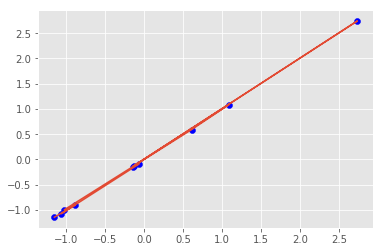

In [17]:
print ('Coefficients',ridgecv.coef_)
print ('Intercept',ridgecv.intercept_)
plt.scatter(Y_test,prediction,color = 'Blue')
plt.plot(Y_test,prediction)
plt.show()

# Finding the RMSE value

In [18]:
np.sqrt(np.mean(residual ** 2))

0.01523889092006526

# Box Plot of Residual

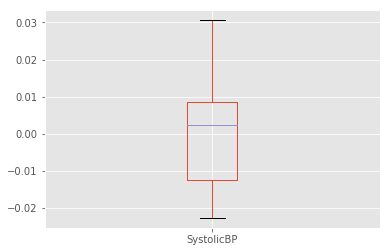

In [19]:
residual.plot(kind = 'box')
plt.show()

# ORDINARY LEAST SQUARE

# Plotting OLS 

                            OLS Regression Results                            
Dep. Variable:             SystolicBP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.126e+04
Date:                Sun, 02 Apr 2017   Prob (F-statistic):          7.24e-146
Time:                        10:45:06   Log-Likelihood:                 226.39
No. Observations:                  90   AIC:                            -444.8
Df Residuals:                      86   BIC:                            -434.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.761e-05      0.002      0.032      0.9

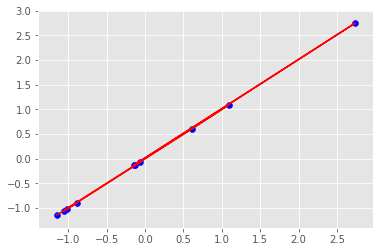

In [20]:
model_scaled = ols.ols(formula='SystolicBP ~ Age + Treated + ScaledBMI', data=train).fit()
print (model_scaled.summary()) 
res = model_scaled.predict(X_test)
residual = res - Y_test
plt.plot(list(Y_test), list(res), color='Red')
plt.scatter(list(Y_test), list(res), color='Blue')
plt.show()

# Finding RMSE

In [21]:
np.sqrt(np.mean(residual ** 2))

0.0094045858065201823

# Box Plot of residual

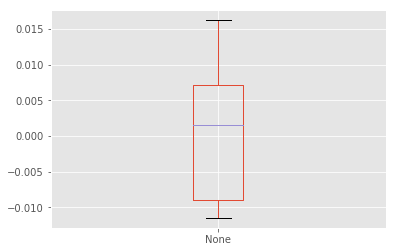

In [22]:
residual.plot(kind = 'box')
plt.show()

# Histogram of residuals

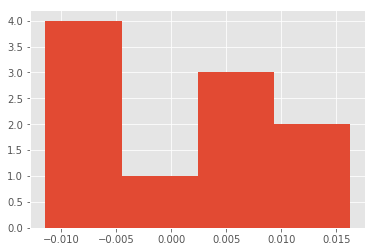

In [23]:
plt.hist(residual,bins = 4)
plt.show()

# USING UNSCALED DATA

# Reading and Cleaning the data

In [24]:
sbp_data =  pd.read_csv('Ex03_SystolicBP_Regreesion.csv')

# Splitting the Data(90-10)

In [25]:
splitend = int(0.9 * len(sbp_data))
sbp_data_shuffled = sbp_data.sample(frac=1)
train, test = sbp_data_shuffled[:splitend], sbp_data_shuffled[splitend:]

# Splitting the data as X_train/Y_train and X_test/Y_test

In [26]:
X_train = train.iloc[:, 0:8]
Y_train = train.iloc[:, 8] 
X_test = test.iloc[:, 0:8]
Y_test = test.iloc[:, 8]

# Plotting the OLS MODEL

                            OLS Regression Results                            
Dep. Variable:             SystolicBP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.295e+04
Date:                Sun, 02 Apr 2017   Prob (F-statistic):          1.06e-148
Time:                        10:45:08   Log-Likelihood:                 64.808
No. Observations:                  90   AIC:                            -121.6
Df Residuals:                      86   BIC:                            -111.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.4254      0.119    518.290      0.0

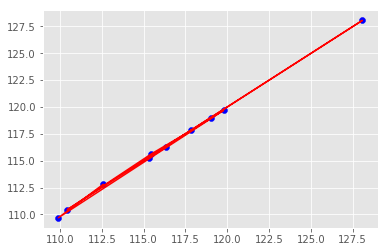

In [27]:
model_scaled = ols.ols(formula='SystolicBP ~ Age + Treated + ScaledBMI', data=train).fit()
print (model_scaled.summary()) 
res = model_scaled.predict(X_test)
plt.scatter(list(Y_test), list(res), color='Blue')
plt.plot(list(Y_test), list(res), color='Red')
plt.show()

# Box Plot

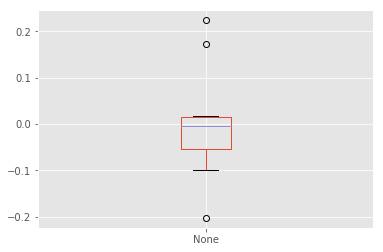

In [28]:
residual = res - Y_test
residual.plot(kind= 'box')
plt.show()

# Finding RMSE

In [29]:
np.sqrt(np.mean(residual ** 2))

0.11664492498237694

# GoldFeld Quandt Test for Null Hypothesis
## p-value <   0.05 - Reject 
## p-value >= 0.05- Accept

In [30]:
name = ['F statistics', 'p-value']
test = sms.het_goldfeldquandt(model_scaled.resid, model_scaled.model.exog)
list(zip(name, test))

[('F statistics', 0.75196373661305571), ('p-value', 0.81742445880059622)]